In [135]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns

In [136]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
#import the diabetes dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv')

In [138]:
data.shape

(768, 9)

In [139]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [141]:
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [142]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [143]:
#identify zeros
zeros_identified = data == 0
zeros_identified

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,True
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,True
764,False,False,False,False,True,False,False,False,True
765,False,False,False,False,False,False,False,False,True
766,False,False,False,True,True,False,False,False,False


In [144]:
# Count the number of zeros in each column
zeros_count = zeros_identified.sum()
zeros_count

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [145]:
# Outcome is the dependent variable, zeros in pregnancies column is not considered here. so dropping these variable and treat zeros in all other variables as null values
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [146]:
# Replace zeros with NaN in specified columns
data[columns_to_replace] = data[columns_to_replace].replace(0, np.nan)

In [147]:
data.isna().sum()


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [148]:
# Now we  Treat zeros as missing values and impute them using  suitable methods

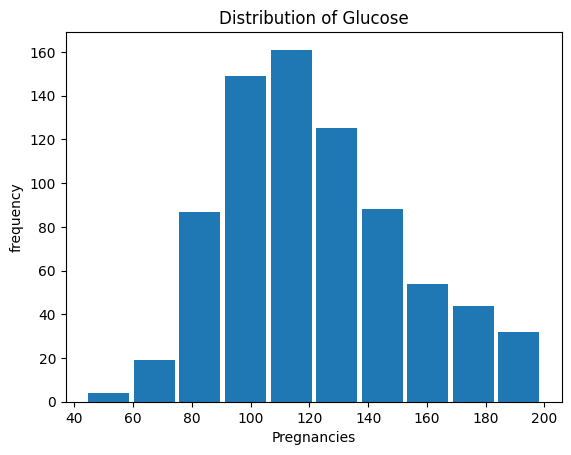

In [149]:
#plot each variables to identify its distribution using Histogram
plt.hist(data['Glucose'], rwidth = 0.90)
plt.title('Distribution of Glucose')
plt.xlabel('Pregnancies')
plt.ylabel('frequency')
plt.show()


In [150]:
# fill the variable pregnancy using median
data['Glucose']=data['Glucose'].fillna(data['Glucose'].median())

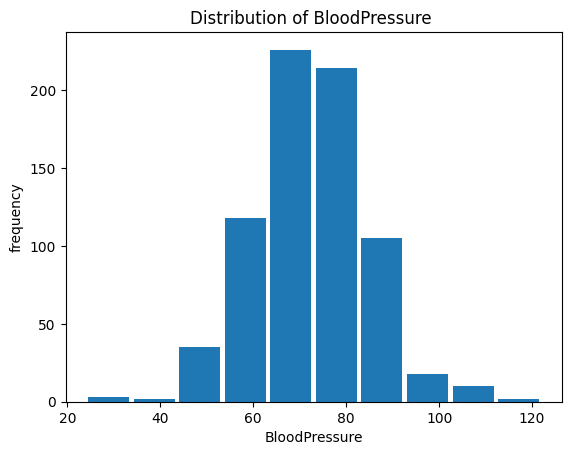

In [151]:
plt.hist(data['BloodPressure'], rwidth = 0.90)
plt.title('Distribution of BloodPressure ')
plt.xlabel('BloodPressure')
plt.ylabel('frequency')
plt.show()

In [152]:
# fill the variable BloodPressure using mean
data['BloodPressure']=data['BloodPressure'].fillna(data['BloodPressure'].mean())

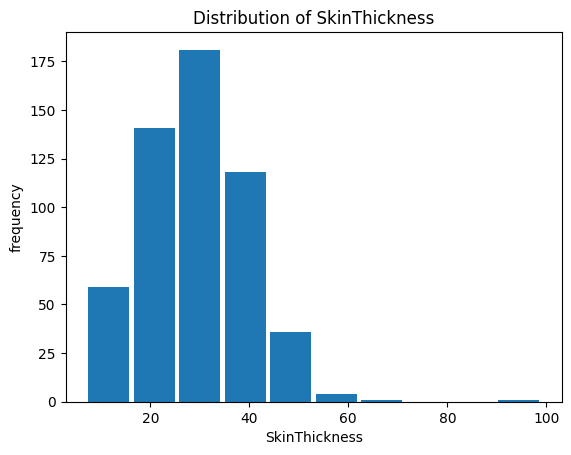

In [153]:
plt.hist(data['SkinThickness'], rwidth = 0.90)
plt.title('Distribution of SkinThickness')
plt.xlabel('SkinThickness')
plt.ylabel('frequency')
plt.show()

In [154]:
# fill the variable SkinThickness using median
data['SkinThickness']=data['SkinThickness'].fillna(data['SkinThickness'].median())

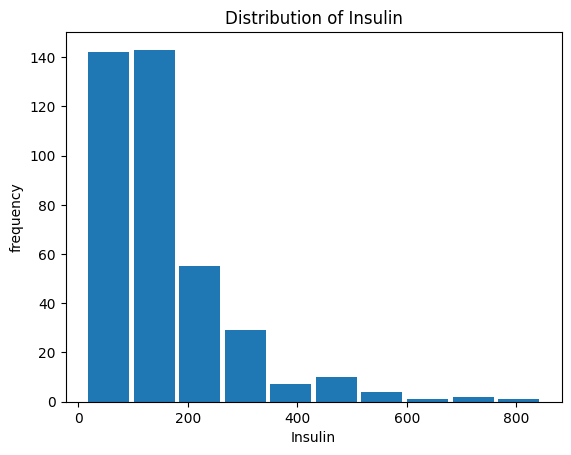

In [155]:
plt.hist(data['Insulin'], rwidth = 0.90)
plt.title('Distribution of Insulin')
plt.xlabel('Insulin')
plt.ylabel('frequency')
plt.show()

In [156]:
# fill the variable Insulin using median
data['Insulin']=data['Insulin'].fillna(data['Insulin'].median())

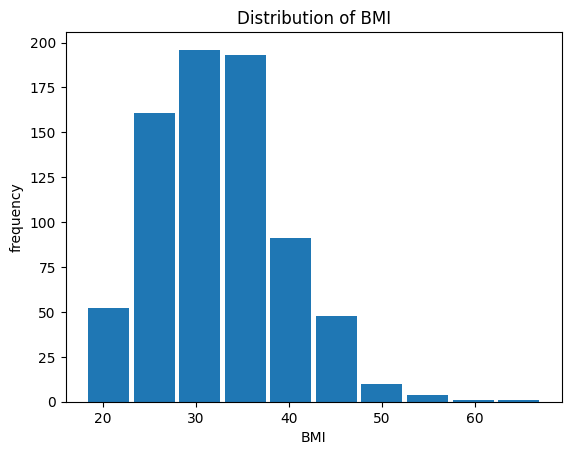

In [157]:
plt.hist(data['BMI'], rwidth = 0.90)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('frequency')
plt.show()

In [158]:
# fill the variable BMI using median
data['BMI']=data['BMI'].fillna(data['BMI'].median())

In [159]:
data.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [160]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [161]:
#identify duplicated rows
data.duplicated().sum()

0

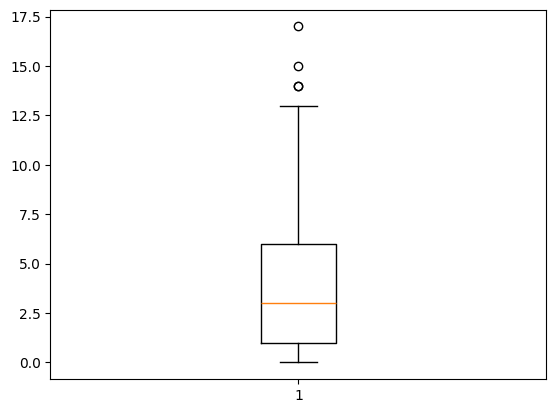

In [162]:
# Boxplot to identify outliers in each column
Pregnancies= data["Pregnancies"]
plt.boxplot(Pregnancies)
plt.show()



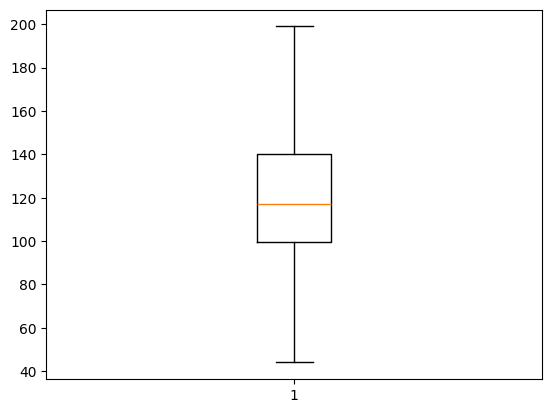

In [163]:
Glucose= data["Glucose"]
plt.boxplot(Glucose)
plt.show()

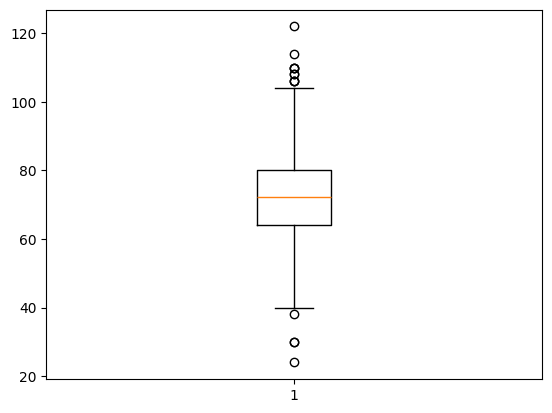

In [164]:
BloodPressure= data["BloodPressure"]
plt.boxplot(BloodPressure)
plt.show()

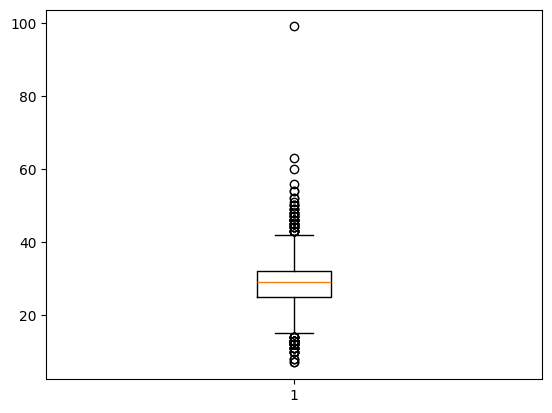

In [165]:
SkinThickness= data["SkinThickness"]
plt.boxplot(SkinThickness)
plt.show()

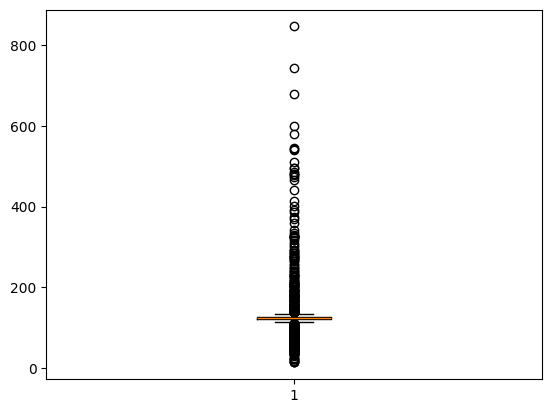

In [166]:
Insulin= data["Insulin"]
plt.boxplot(Insulin)
plt.show()

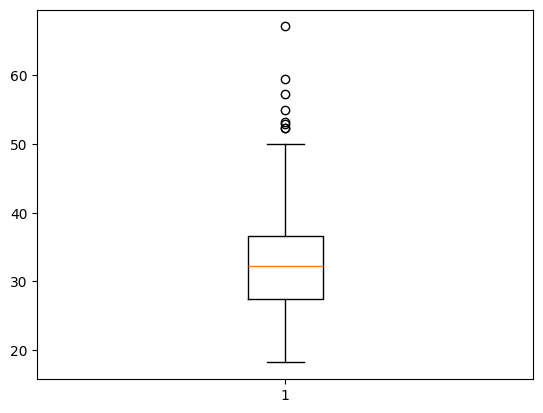

In [167]:
BMI= data["BMI"]
plt.boxplot(BMI)
plt.show()

In [168]:
#clear outliers in BMI
q1 = np.quantile(data['BMI'], 0.25)
q3= np.quantile(data['BMI'], 0.75)
iqr = q3-q1
lb = q1- 1.5*iqr
up = q3+ 1.5*iqr


In [169]:
#remove outliers in upper bpound
data = data[data["BMI"]<up]

{'whiskers': [<matplotlib.lines.Line2D at 0x7bbe47a80f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7bbe47a817b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bbe47a24fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bbe47a82980>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bbe47a80eb0>],
 'means': []}

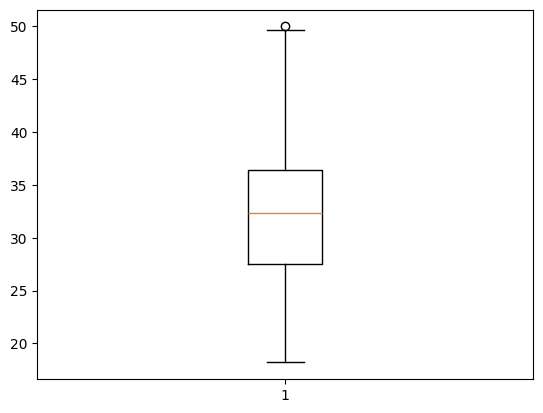

In [170]:
plt.boxplot(data["BMI"])

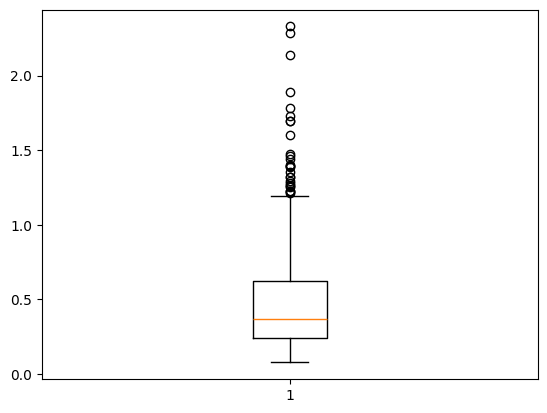

In [171]:
DiabetesPedigreeFunction= data["DiabetesPedigreeFunction"]
plt.boxplot(DiabetesPedigreeFunction)
plt.show()

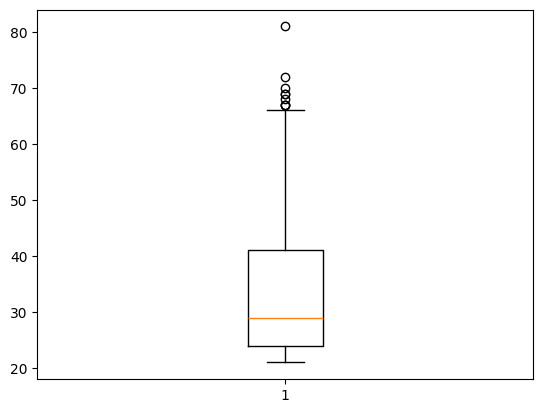

In [172]:
Age= data["Age"]
plt.boxplot(Age)
plt.show()

In [173]:
#cleared the outliers of BMI only

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               760 non-null    int64  
 1   Glucose                   760 non-null    float64
 2   BloodPressure             760 non-null    float64
 3   SkinThickness             760 non-null    float64
 4   Insulin                   760 non-null    float64
 5   BMI                       760 non-null    float64
 6   DiabetesPedigreeFunction  760 non-null    float64
 7   Age                       760 non-null    int64  
 8   Outcome                   760 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 59.4 KB


In [175]:
#Feature Target Splitting
x = data.drop('Outcome', axis = 1)
y = data['Outcome']

In [176]:
#splitting dataset- training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x, y,test_size = 0.2,random_state=42)

# **Logistic Regression**

In [177]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [178]:
#confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,y_pred)


array([[86, 10],
       [24, 32]])

In [179]:
print('accuracy_score = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall_score = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))


accuracy_score =  0.7763157894736842
Precision =  0.7619047619047619
Recall_score =  0.5714285714285714
f1 score =  0.6530612244897959


In [180]:
#logistic regression after scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [181]:
log_model_sc = LogisticRegression()
log_model_sc.fit(x_train_sc,y_train)
y_pred_sc = log_model_sc.predict(x_test_sc)
confusion_matrix(y_test,y_pred_sc)

array([[86, 10],
       [25, 31]])

# **kNN**

In [182]:
from sklearn.neighbors import KNeighborsClassifier
#find the neighbor
metrik_k = []
neighbors = np.arange(2,15)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metrik_k.append(acc)


In [183]:
metrik_k

[0.6710526315789473,
 0.6907894736842105,
 0.7105263157894737,
 0.7039473684210527,
 0.6973684210526315,
 0.7105263157894737,
 0.743421052631579,
 0.75,
 0.743421052631579,
 0.7236842105263158,
 0.756578947368421,
 0.7828947368421053,
 0.75]

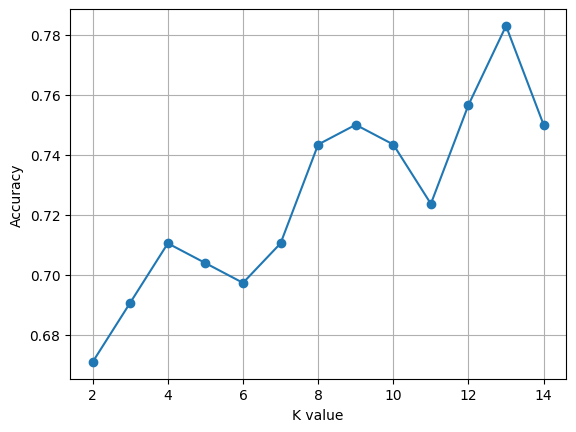

In [184]:
plt.plot(neighbors,metrik_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [185]:
# KNN
classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)



In [186]:
print('accuracy_score = ',accuracy_score(y_test,y_pred_knn))
print('Precision = ',precision_score(y_test,y_pred_knn))
print('Recall_score = ',recall_score(y_test,y_pred_knn))
print('f1 score = ',f1_score(y_test,y_pred_knn))

accuracy_score =  0.7828947368421053
Precision =  0.7254901960784313
Recall_score =  0.6607142857142857
f1 score =  0.6915887850467289


In [187]:
#scaling
metrik_k = []
neighbors = np.arange(2,15)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train_sc,y_train)
  y_pred = classifier.predict(x_test_sc)
  acc = accuracy_score(y_test,y_pred)
  metrik_k.append(acc)


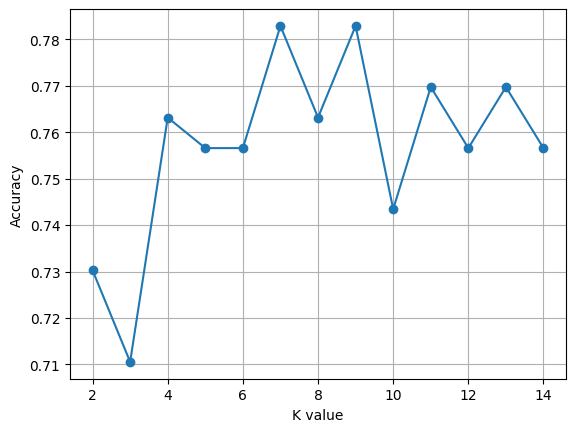

In [188]:
plt.plot(neighbors,metrik_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [189]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(x_train_sc,y_train)
y_pred_knn_sc = classifier.predict(x_test_sc)
accuracy_score(y_test,y_pred_knn_sc)


0.7828947368421053

In [190]:
print('accuracy_score = ',accuracy_score(y_test,y_pred_knn_sc))
print('Precision = ',precision_score(y_test,y_pred_knn_sc))
print('Recall_score = ',recall_score(y_test,y_pred_knn_sc))
print('f1 score = ',f1_score(y_test,y_pred_knn_sc))

accuracy_score =  0.7828947368421053
Precision =  0.7090909090909091
Recall_score =  0.6964285714285714
f1 score =  0.7027027027027027


# **SVM**

In [191]:
from sklearn.svm import SVC
sv = SVC()

sv.fit(x_train,y_train)
y_pred_sv = sv.predict(x_test)

In [192]:
print('accuracy_score = ',accuracy_score(y_test,y_pred_sv))
print('Precision = ',precision_score(y_test,y_pred_sv))
print('Recall_score = ',recall_score(y_test,y_pred_sv))
print('f1 score = ',f1_score(y_test,y_pred_sv))

accuracy_score =  0.75
Precision =  0.78125
Recall_score =  0.44642857142857145
f1 score =  0.5681818181818182


In [193]:
#scaling
sv.fit(x_train_sc, y_train)
y_pred_sv_sc= sv.predict(x_test_sc)

In [194]:
print('accuracy_score = ',accuracy_score(y_test,y_pred_sv_sc))
print('Precision = ',precision_score(y_test,y_pred_sv_sc))
print('Recall_score = ',recall_score(y_test,y_pred_sv_sc))
print('f1 score = ',f1_score(y_test,y_pred_sv_sc))

accuracy_score =  0.75
Precision =  0.7368421052631579
Recall_score =  0.5
f1 score =  0.5957446808510638


In [195]:
sv1=SVC(kernel = "poly", degree = 3)
sv1.fit(x_train, y_train)
y_pred_sv1 = sv1.predict(x_test)
accuracy_score(y_test, y_pred_sv1)


0.743421052631579

# **Naive Bayes**

In [196]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)



In [197]:
print('accuracy_score = ',accuracy_score(y_test,y_pred_gnb))
print('Precision = ',precision_score(y_test,y_pred_gnb))
print('Recall_score = ',recall_score(y_test,y_pred_gnb))
print('f1 score = ',f1_score(y_test,y_pred_gnb))

accuracy_score =  0.75
Precision =  0.6730769230769231
Recall_score =  0.625
f1 score =  0.6481481481481481


In [198]:
#scaling
gnb.fit(x_train_sc, y_train)
y_pred_gnb_sc= gnb.predict(x_test_sc)

In [199]:
print('accuracy_score = ',accuracy_score(y_test,y_pred_gnb_sc))
print('Precision = ',precision_score(y_test,y_pred_gnb_sc))
print('Recall_score = ',recall_score(y_test,y_pred_gnb_sc))
print('f1 score = ',f1_score(y_test,y_pred_gnb_sc))

accuracy_score =  0.75
Precision =  0.6730769230769231
Recall_score =  0.625
f1 score =  0.6481481481481481


# **Decision Tree**

In [200]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train, y_train)
y_pred_dt = clf.predict(x_test)

In [201]:
print('accuracy_score = ',accuracy_score(y_test,y_pred_dt))
print('Precision = ',precision_score(y_test,y_pred_dt))
print('Recall_score = ',recall_score(y_test,y_pred_dt))
print('f1 score = ',f1_score(y_test,y_pred_dt))

accuracy_score =  0.6644736842105263
Precision =  0.5423728813559322
Recall_score =  0.5714285714285714
f1 score =  0.5565217391304348


In [202]:
#scaling
clf.fit(x_train_sc, y_train)
y_pred_dt_sc = clf.predict(x_test_sc)


In [203]:
print('accuracy_score = ',accuracy_score(y_test,y_pred_dt_sc))
print('Precision = ',precision_score(y_test,y_pred_dt_sc))
print('Recall_score = ',recall_score(y_test,y_pred_dt_sc))
print('f1 score = ',f1_score(y_test,y_pred_dt_sc))

accuracy_score =  0.6513157894736842
Precision =  0.5245901639344263
Recall_score =  0.5714285714285714
f1 score =  0.5470085470085471


In [204]:
clf.classes_

array([0, 1])

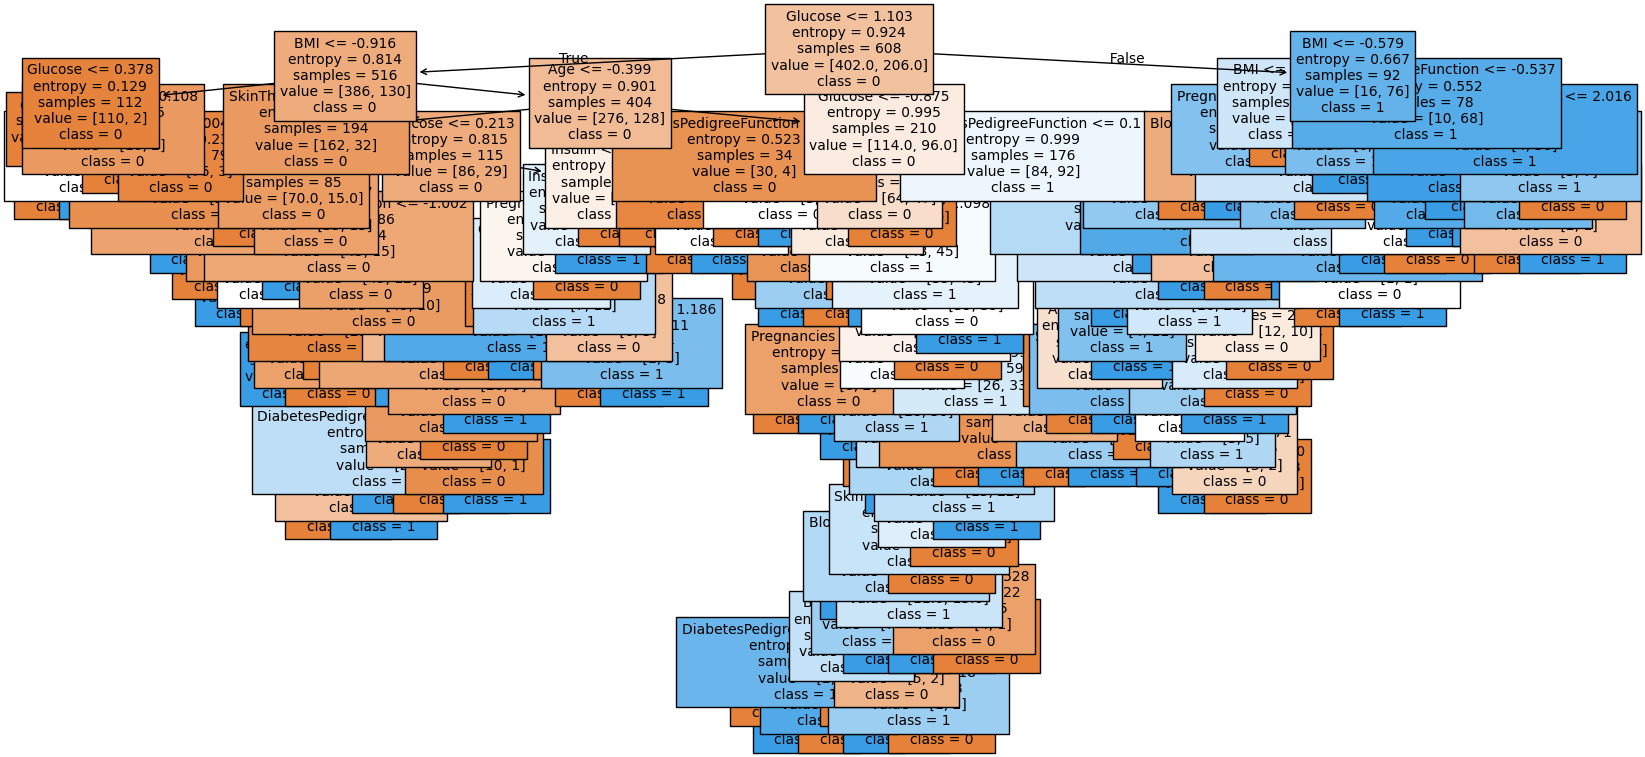

In [205]:
from sklearn import tree
plt.figure(figsize=(20,9))
tree.plot_tree(clf, feature_names = x_train.columns,class_names=clf.classes_.astype('str'),filled = True, fontsize = 10)
plt.show()

In [206]:
# in this study, the model kNN shows high accuracy